In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

class OrdinaryLeastSquaresExact(): 
    
    # find the betas that make the model fit as well as possible (OLS)
    def fit(self, X, y, ones = True): # this function fit the model to some data
        
        self.ones = ones
        # add ones if ones = True
        if self.ones:
            self.data = np.hstack((np.ones([X.shape[0],1]), X)) # stacks a column of ones
        else:
            self.data = X
    
        self.outputs = y
        
        X = self.data
        self.beta = np.linalg.inv(X.T @ X) @ X.T @ y #this is the formula used to minimze the beta (min(L(B))) / minimize the sum of squared errors
        
    # compute predictions for any input dataset X    
    def predict(self, X):
        yPredicted = np.empty([X.shape[0], 1])
        
        if self.ones:
            X = np.hstack((np.ones([X.shape[0], 1]), X))
        
        for row in range(X.shape[0]):
            yPredicted[row] = self.beta @ X[row,]
            
        return yPredicted

The predicted y values are [1.2 1.9 2.6 3.3 4. ]
The real y values are [1 2 3 3 4]
The beta values are [-3.   0.7]
The r^2 score is 0.9423076923076923
The mean squared error is 0.060000000000000074
The mean absolute error is 0.20000000000000212


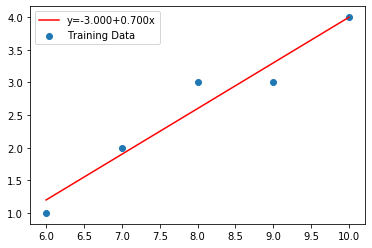

In [9]:
X = np.array([[6], [7], [8], [9], [10]])
y = np.array([1, 2, 3, 3, 4])

model = OrdinaryLeastSquaresExact()
model.fit(X,y)
predictions = model.predict(X)

# print the predictions
print('The predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the beta values
parameters = model.beta
print('The beta values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Training Data')

# plot the fitted model with the training data
xModel = np.linspace(6,10,100)
yModel = parameters[0] + parameters[1]*xModel
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'r', label = lineFormula)

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions))

In [10]:
def univariatePolynomialBasis(M):
    def polynomialM(x):
        out = np.array([])
        
        for i in range(M+1):
            out = np.append(out, x ** i)
            
        return out
    return polynomialM

In [11]:
poly = univariatePolynomialBasis(3)
poly(5)

print(np.apply_along_axis(poly, 1, [[3], [4]]))

[[ 1.  3.  9. 27.]
 [ 1.  4. 16. 64.]]


The predicted y values are [0.95714286 2.17142857 2.74285714 3.17142857 3.95714286]
The real y values are [1 2 3 3 4]
The beta values are [-47.82857143  17.55952381  -2.07142857   0.08333333]
The r^2 score is 0.975274725274725
The mean squared error is 0.025714285714285957
The mean absolute error is 0.1371428571129684


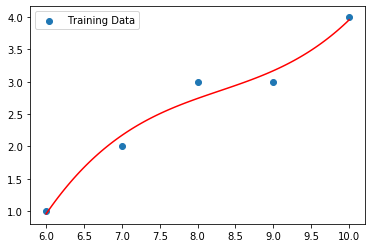

In [12]:
X = np.array([[6], [7], [8], [9], [10]])
y = np.array([1, 2, 3, 3, 4])

model = OrdinaryLeastSquaresExact()

poly = univariatePolynomialBasis(3)
Xh = np.apply_along_axis(poly, 1, X)

model.fit(Xh,y, ones = False)
predictions = model.predict(Xh)

# print the predictions
print('The predicted y values are', predictions.T[0])

# print the real y values
print('The real y values are', y)

# print the beta values
parameters = model.beta
print('The beta values are', parameters)

# plot the training points
plt.scatter(X, y, label = 'Training Data')

# plot the fitted model with the training data
xModel = np.atleast_2d(np.linspace(6,10,100)).T
yModel = np.sum(parameters * np.apply_along_axis(poly, 1, xModel), axis = 1)
lineFormula = 'y={:.3f}+{:.3f}x'.format(parameters[0], parameters[1])
plt.plot(xModel, yModel, 'r')

# add a legend
plt.legend()

# return quality metrics
print('The r^2 score is', r2_score(y, predictions))
print('The mean squared error is', mean_squared_error(y, predictions))
print('The mean absolute error is', mean_absolute_error(y, predictions))